<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Lauren Kremer**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



1. Open each "sites" folder
    a. open the landsat-crop folder
        -generate a list of files for ndvi calcs (bands 4 and 5)
        -access qa files from same folder for cloud mask
    b. make a list of paths for crop .shp files 

2.  With bands 4 and 5 for each image, generate a function that:
    a. mask invalid values (1-10000)
    b. calculate NDVI
    c. clip to boundary
    d. mask clouds using qa layer
    e. calculate mean NDVI for each image and generate a 
    dataframe with image date and site colums.
    
3. apply NDVI function 
    a. generate dateframes from band and crop shape lists in a loop 
    b. concatonate dataframe from each image into one plottable df
     
4. Plot ndvi values as a timeseries
    

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
import earthpy as et
import pandas as pd

# Download data 
et.data.get_data('ndvi-automation')

# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


In [4]:
# The NDVI automation download provides 30m resolution Landsat data and shapefiles for
# two study sites, one in San Joaquin, CA and the other in Harvard Forest, MA. The two sites
# differ in vegetation coverage density and type, making them ideal for reviewing potential 
# differences in NDVvi time series analysis. Landsat data provided includes images for 
# approximately 23 days between Jan 12, 2017 to December 30, 2017 and for each image, 
# bands 1-5 and a quality assessment band are included in the download.

# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [5]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [6]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

# Function 1. Generate a crop_boundary for each site 

def open_boundary(site_path):
    """generate a list of boundary shapefiles for clipping landsat data to study area
    Parameters
    -----------
    vector_path : a path to the directory containing desire shapefile
        
    Returns
    -----------
    gpd : a geopandas geodataframe 
    """
    # Open crop boundary
    vector_dir = os.path.join(site_path, "vector")
    site_name = os.path.basename(os.path.normpath(site_path))
    site_boundary_path = os.path.join(vector_dir,  site_name + "-crop.shp")
    crop_bound = gpd.read_file(site_boundary_path)
    crop_bound['Site'] = site_name 
    return crop_bound

# Function 2. Generate a list of landsat 8 image folders for each site
  
def build_image_list(landsat_dir):
    """generates a list of landsat bands 4 and 5 from folder of images
    Parameters
    -----------
    landsat_dir : a path to the folder/directory of image subfolders which
    contain landsat bands
        
    Returns
    -----------
    list : a list of .tif filepaths that can be used to calculate NDVI
    """
    
    image_list = []

    image_paths = sorted(glob(os.path.join(landsat_dir, "LC08*")))
    image_list.append(image_paths)
    image_list = [i for b in map(lambda x:[x] if not isinstance(x, list) 
                                 else x, image_list) for i in b] # unlists nested lists
    return image_list

# Function 3. 
def mask_crop_ndvi(image_folder, vals, crop_extent, valid_range = None):
    
    """Open bands 4 and 5 in each image folder, mask according to valid_range of pixel
    values, then stores them in a two band list used to calculate NDVI at each pixel.  
    Then masks clouds using the qa file in the image folder and clips them from a
    .shp file indicated by the function parameter (crop_extent). Then
    generates dataframe from image mean NDVI with date and site name. 

    Parameters
    -----------
    image_folder : list of Landsat 8 folders containing image bands
    vals: A list of values needed to create the cloud mask
    crop_extent: geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None 

    Returns
    -----------
    ndvi_df : Pandas dataframe
        a dataframe containing cropped image mean NDVI values indexed by date
    """
    
    band_path = sorted(glob(os.path.join(image_folder, "*band*[4-5].tif")))
    opened_bands = []
    
    for i in band_path:
        landsat_45 = rxr.open_rasterio(i, masked=True).rio.clip(crop_extent.geometry,
                                                            from_disk=True).squeeze()
        if valid_range:
            mask = ((landsat_45 < valid_range[0]) | (landsat_45 > valid_range[1]))
            band = landsat_45.where(~xr.where(mask, True, False))
            opened_bands.append(band)
          
    img_ndvi = (opened_bands[1] - opened_bands[0]) / (opened_bands[1] + opened_bands[0])

    # # then open pixel_qa 
    qa_paths = glob(os.path.join(image_folder, "*qa*"))
    path_str = ' '.join([str(elem) for elem in qa_paths]) 
    qa_open = rxr.open_rasterio(path_str).rio.clip(crop_extent.geometry,
                                                              from_disk=True).squeeze()
    ndvi_mask = img_ndvi.where(~qa_open.isin(vals))
    
    # create the dataframe
    ndvi_df = pd.DataFrame()
    ndvi_df['mean_ndvi'] = pd.Series({"mean": ndvi_mask.mean()}, dtype=float)
    ndvi_df['site'] = image_folder[22:26]
    ndvi_df['date'] = pd.to_datetime(image_folder[50:58], format = '%Y%m%d')
    ndvi_df.set_index('date', inplace=True)
    return ndvi_df


In [7]:
# For optimal processing, only bands needed for NDVI calculations and cloud masking (qa)
# were opened. Bands were clipped upon opening to decrease file size to only geographic
# area of interest, and the cloudmask was applied only to the the NDVI array to reduce 
# processing time over applying a mask to each band used for the calculation. The output 
# of the above function only returns a dataframe of required data, rather than any arrays 
# used for calculations within the dataframe. 

In [8]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# Indicate path to site directories
path = os.path.join("ndvi-automation", "sites")

# Get a list of both site directories 
sites = sorted(glob(path + "/*/"))

# build list (build_image_list)of landsat image folders containing bands:
sitelists = []
for i in sites:
    site_list = build_image_list(landsat_dir = os.path.join(i, "landsat-crop"))
    sitelists.append(site_list)
    #sitelists = [i for b in map(lambda x:[x] if not isinstance(x, list) else x, sitelists) for i in b]
sitelists[0][4] #identify one image folder specific to Task 1.

# Open shapefiles using open_boundary function
bounds = []
for i in sites:
    boundy = open_boundary(i)
    bounds.append(boundy)

bounds[0] # identify harv geodf for Task 1.

# Identify variables for mask_cloud function:

# Cloud no data vals for Landsat 8 -
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]
               
# apply ndvi calculation and masking function for specific image
mask_crop_ndvi(image_folder = sitelists[0][4], vals = vals, crop_extent = bounds[0], 
               valid_range = (0, 10000))


,mean_ndvi,site
date,,
2017-03-17,0.281132,HARV


In [9]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

In [10]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# apply ndvi calc and masking function using bounds list as the crop-extent parameter
#in mask_crop_ndvi
indexed_dfs = []

for i, j  in zip(sitelists, bounds):
    for k in i:
        output_df = mask_crop_ndvi(image_folder = k, vals = vals, crop_extent = j, 
                   valid_range = (0, 10000))
        indexed_dfs.append(output_df) #add it to a new list sorted in order

mean_masked_ndvi = pd.concat(indexed_dfs) #combine dfs in list to new dataframe
mean_masked_ndvi # call final object 


,mean_ndvi,site
date,,
2017-01-12,NaN,HARV
2017-01-28,NaN,HARV
2017-02-13,NaN,HARV
2017-03-01,NaN,HARV
2017-03-17,0.281132,HARV
2017-04-02,0.251133,HARV
2017-04-18,0.541080,HARV
2017-05-04,0.568924,HARV
2017-05-20,0.811310,HARV


In [11]:
# Using a parallel loop to call the appropriate boundary shapefile in each iteration 
# cloud_mask function may not be ideal for processing time (loops costly in terms 
# of processing time?), but the script is efficiently short, easy to follow and produces 
# the entire dataframe with one command (at least before concatonation of the dataframe), 
# rather than having to run the mask function separately for each site/shapefile. 

In [12]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:12.571908.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

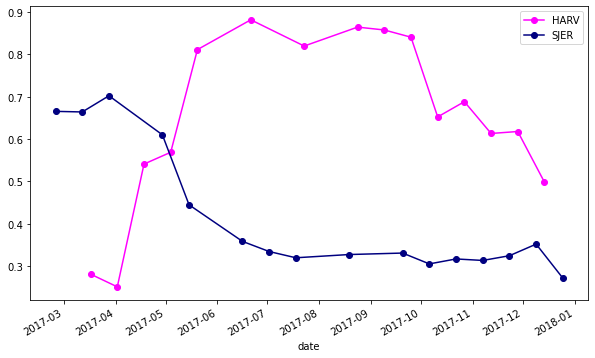

In [13]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# subset dataframe to exclude "NA" values
plot_data = mean_masked_ndvi[mean_masked_ndvi['mean_ndvi'].notna()]


colorPalette = {'HARV': 'magenta',
                'SJER': 'navy'}

# # Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

for key, data in plot_data.groupby('site'):
    data.plot(use_index=True, 
              y='mean_ndvi', 
              ax=ax, 
              marker='o', 
              label=key,
              color = colorPalette)
 

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [14]:
# Ignore this cell for the autograding tests


In [15]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

1. I would opt to fly at a time near the peak mean NDVI, likely early April for San Joaquin and near the end of June for Harvard Forest.  However, I would likely pick a period from several years worth of data.  Using Landsat 8, we may be able to determine an ideal period from up to eight years of data. 

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

2. My current workflow would support that pretty easily. To look at an individual site, I could skip the part of the loops that incorporated 'sites' which was a means to access multiple sites. The current functions review all image folders in the supplied path, so we could extend the time period reviewed simply by adding more image folders. If I wanted to review NDVI images rather than compare changes in a dataframe, I could remove the dataframe building chunk from my mask_cloud function and the function would instead return a list of arrays that I could plot from. 

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [16]:
#csvfile= os.path.join(et.io.HOME,
#                      "earth-analytics", 
#                      "ea-2021-04-ndvi-automation-streamfireflies",
#                      "mean_masked_ndvi.csv")
#mean_masked_ndvi.to_csv(csvfile)

# Was able to generate a .csv to be pushed to my repo, but the CI didn't like this. 
# Is it because the file isn't in the main (earthlab) repo?